# Problem: Closest Pair of Points

We are given a **cloud of points** in the plane (2D).  
Each point is defined by its coordinates `(x, y)`.

The task is to **find the pair of points that are closest to each other**  
(i.e., the two points with the smallest Euclidean distance between them).

---

### Input
- A set (or list) of `n` points:  
  \[
  P = \{ (x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) \}
  \]

### Output
- Two points \((p_i, p_j)\) such that the distance between them is minimal:
  \[
  d(p_i, p_j) = \min_{k \neq l} d(p_k, p_l)
  \]
- The corresponding distance value.

---

### Goal
1. Represent the cloud of points in Python.
2. Implement an algorithm to find the closest pair.
   - Start with the **naïve approach**: check all pairs.
   - Later, explore more efficient solutions.

---


List of points (first 5): [(5.363254289436169, 8.779393293020355), (7.235755993778294, 8.12418697422521), (3.082966486189811, 3.1560984529426452), (2.2932070297782428, 4.904720840688126), (0.37822434196610244, 7.564370000940573)]
Numpy array shape: (30, 2)


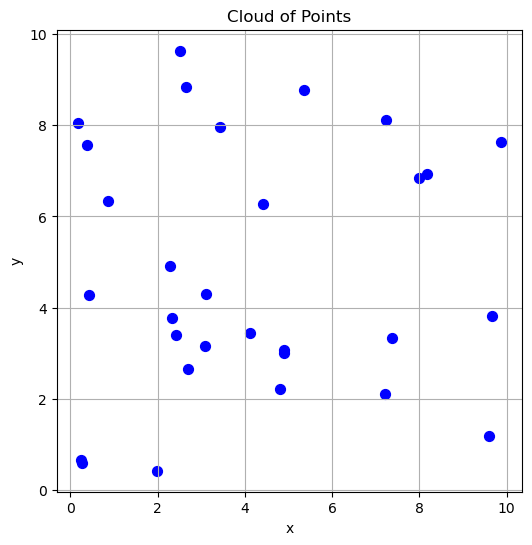

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate a cloud of points (say 30 points in 2D)
# As a list of tuples
points_list = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(30)]

# 2) Same points as a NumPy array (shape = (30, 2))
points_array = np.array(points_list)

# Show their representation
print("List of points (first 5):", points_list[:5])
print("Numpy array shape:", points_array.shape)

# 3) Plot the cloud of points
plt.figure(figsize=(6, 6))
plt.scatter(points_array[:, 0], points_array[:, 1], color="blue", s=50)
plt.title("Cloud of Points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Naïve Solution (Brute Force)

**Idea:**  
Compare every point with every other point, compute the Euclidean distance,  
and keep track of the smallest distance found.

---

### Pseudocode

```text
function closest_pair_bruteforce(points):
    best_distance = ∞
    best_pair = (None, None)

    for i from 0 to n-1:
        for j from i+1 to n-1:
            dx = points[i].x - points[j].x
            dy = points[i].y - points[j].y
            distance = sqrt(dx*dx + dy*dy)

            if distance < best_distance:
                best_distance = distance
                best_pair = (i, j)

    return best_pair, best_distance

Time complexity: O(n²)

Space complexity: O(1)

Notes: Simple to implement but inefficient for large point clouds.

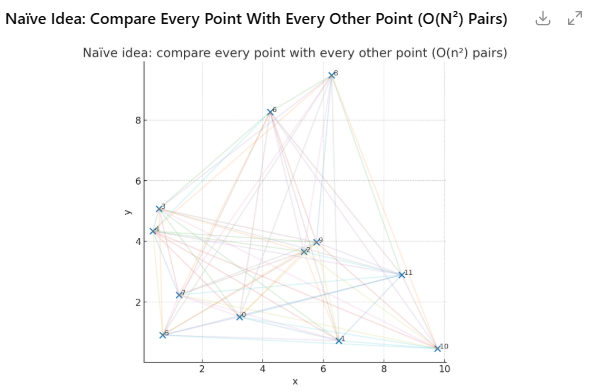

In [3]:
from typing import List, Tuple
from math import sqrt
import random

Point2D = Tuple[float, float]

def euclidean_distance(p: Point2D, q: Point2D) -> float:
    """Compute Euclidean distance between two 2D points."""
    return sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

def closest_pair_bruteforce(points: List[Point2D]) -> Tuple[Tuple[int, int], float]:
    """
    Return the closest pair of points (by index) and their distance
    using the brute-force O(n^2) algorithm.
    """
    n = len(points)
    if n < 2:
        raise ValueError("Need at least two points")

    best_pair = (0, 1)
    best_dist = euclidean_distance(points[0], points[1])

    for i in range(n):
        for j in range(i + 1, n):
            d = euclidean_distance(points[i], points[j])
            if d < best_dist:
                best_dist = d
                best_pair = (i, j)

    return best_pair, best_dist

In [7]:
# --- Example usage ---
random.seed(0)
points = [(random.randint(0, 10), random.randint(0, 2)) for _ in range(10)]
print("Points:", points)
pair, dist = closest_pair_bruteforce(points)
print("Closest pair:", points[pair[0]], "and", points[pair[1]])
print("Distance:", dist)


Points: [(6, 1), (0, 1), (8, 1), (6, 1), (7, 1), (9, 0), (8, 0), (4, 0), (1, 2), (4, 2)]
Closest pair: (6, 1) and (6, 1)
Distance: 0.0
